In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
import csv

In [4]:
pose_data = pd.read_csv("cat_static (3)-XG.csv",encoding='utf-8')
pose_data.dropna()
print(pose_data)

           ax        ay        az  action
0    0.221313 -0.941650 -0.244263       0
1    0.215454 -0.948120 -0.244873       0
2    0.146851 -0.957397 -0.255737       0
3    0.091309 -0.954956 -0.281860       0
4    0.083130 -0.955444 -0.283936       0
..        ...       ...       ...     ...
218 -0.463257  0.608643  0.487061       4
219 -0.017334  0.788574  0.414551       4
220 -0.459717  0.890137  0.217773       4
221 -0.011963  1.148315 -0.193970       4
222  0.518433  0.874023 -0.227539       4

[223 rows x 4 columns]


In [18]:
df_data = pd.DataFrame(data= pose_data,
                     columns= ['ax','ay','az','action'])
df_data

,ax,ay,az,action
0,0.221313,-0.941650,-0.244263,0
1,0.215454,-0.948120,-0.244873,0
2,0.146851,-0.957397,-0.255737,0
3,0.091309,-0.954956,-0.281860,0
4,0.083130,-0.955444,-0.283936,0
...,...,...,...,...
218,-0.463257,0.608643,0.487061,4
219,-0.017334,0.788574,0.414551,4
220,-0.459717,0.890137,0.217773,4
221,-0.011963,1.148315,-0.193970,4


In [42]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['action'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['action'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)


train shape: (156, 3)
test shape: (67, 3)


array([[-0.153442,  0.493774, -0.863037],
       [-0.335571,  0.94165 , -0.046387],
       [ 0.265747, -0.465942, -0.861938],
       [-0.283447,  0.960815, -0.052124],
       [-0.625977,  0.425659,  0.503174],
       [-0.330933,  0.938599, -0.024414],
       [-0.28186 ,  0.952271, -0.064697],
       [ 0.436768, -0.212524, -0.924561],
       [ 0.069214, -0.95459 , -0.290527],
       [-0.818115,  1.915894,  0.958008],
       [ 0.130615, -0.162354, -0.986206],
       [-0.420288,  0.915771, -0.05896 ],
       [-0.29126 ,  0.957642, -0.015381],
       [-0.294312,  0.951416, -0.015381],
       [ 0.461426, -0.225464, -0.836792],
       [ 0.449463, -0.211548, -0.910889],
       [ 0.225464, -0.424438, -0.914551],
       [ 0.278809, -0.442627, -0.869995],
       [ 0.380371, -0.240723, -0.917969],
       [-0.348389,  0.92981 , -0.07666 ],
       [ 0.070068, -0.953857, -0.293457],
       [ 0.378296, -0.307251, -0.909058],
       [ 0.208984, -0.264038, -0.922974],
       [ 0.4021  , -0.300537, -0.8

In [25]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)

Text(0.5, 1.0, 'LinearSVC (linear kernel)\nAccuracy:0.53')

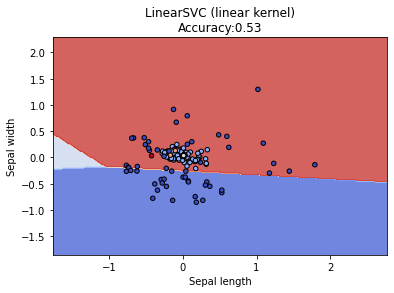

In [27]:
from sklearn import svm

# 建立 linearSvc 模型
linearSvcModel=svm.LinearSVC(C=1, max_iter=10000)
# 使用訓練資料訓練模型
linearSvcModel.fit(train_reduced, y_train)
# 使用訓練資料預測分類
predicted=linearSvcModel.predict(train_reduced)
# 計算準確率
accuracy = linearSvcModel.score(train_reduced, y_train)

X0, X1 = train_reduced[:, 0], train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, linearSvcModel, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('LinearSVC (linear kernel)'+ '\n' + 'Accuracy:%.2f'%accuracy)

Text(0.5, 1.0, 'SVC with linear kernel\nAccuracy:0.51')

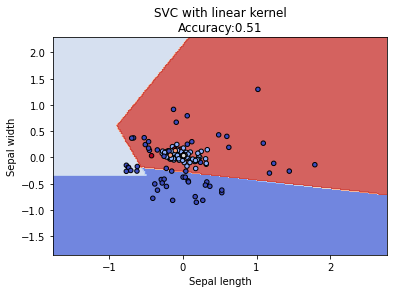

In [28]:
from sklearn import svm

# 建立 kernel='linear' 模型
svcModel=svm.SVC(kernel='linear', C=1)
# 使用訓練資料訓練模型
svcModel.fit(train_reduced, y_train)
# 使用訓練資料預測分類
predicted=svcModel.predict(train_reduced)
# 計算準確率
accuracy = svcModel.score(train_reduced, y_train)

X0, X1 = train_reduced[:, 0], train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, svcModel, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVC with linear kernel'+ '\n' + 'Accuracy:%.2f'%accuracy)

Text(0.5, 1.0, 'SVC with polynomial (degree 3) kernel\nAccuracy:0.44')

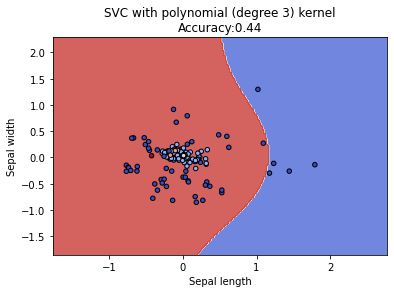

In [29]:
from sklearn import svm

# 建立 kernel='poly' 模型
polyModel=svm.SVC(kernel='poly', degree=3, gamma='auto', C=1)
# 使用訓練資料訓練模型
polyModel.fit(train_reduced, y_train)
# 使用訓練資料預測分類
predicted=polyModel.predict(train_reduced)
# 計算準確率
accuracy = polyModel.score(train_reduced, y_train)

X0, X1 = train_reduced[:, 0], train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, polyModel, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVC with polynomial (degree 3) kernel'+ '\n' + 'Accuracy:%.2f'%accuracy)

Text(0.5, 1.0, 'SVC with RBF kernel\nAccuracy:0.60')

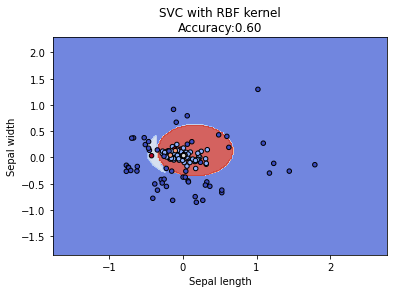

In [30]:
from sklearn import svm

# 建立 kernel='rbf' 模型
rbfModel=svm.SVC(kernel='rbf', gamma=0.7, C=1)
# 使用訓練資料訓練模型
rbfModel.fit(train_reduced, y_train)
# 使用訓練資料預測分類
predicted=rbfModel.predict(train_reduced)
# 計算準確率
accuracy = rbfModel.score(train_reduced, y_train)

X0, X1 = train_reduced[:, 0], train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, rbfModel, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVC with RBF kernel'+ '\n' + 'Accuracy:%.2f'%accuracy)

In [20]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)

In [21]:
print('訓練集: ',xgboostModel.score(X_train,y_train))
print('測試集: ',xgboostModel.score(X_test,y_test))

訓練集:  1.0
測試集:  0.9701492537313433


特徵重要程度:  [0.13487683 0.50861526 0.35650793]


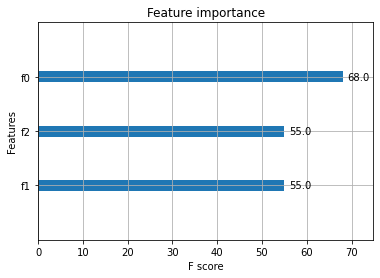

In [22]:
from xgboost import plot_importance
from xgboost import plot_tree

plot_importance(xgboostModel)
print('特徵重要程度: ',xgboostModel.feature_importances_)

In [23]:
df_test=pd.DataFrame(X_test, columns= ['ax','ay','az'])
df_test['action'] = y_test
pred = xgboostModel.predict(X_test)
df_test['Predict'] = pred

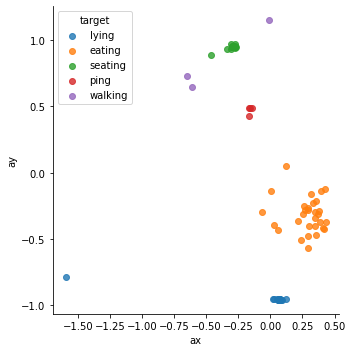

In [26]:
sns.lmplot(x="ax", y="ay", hue='action', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['lying', 'eating', 'seating','ping','walking'])
plt.show()

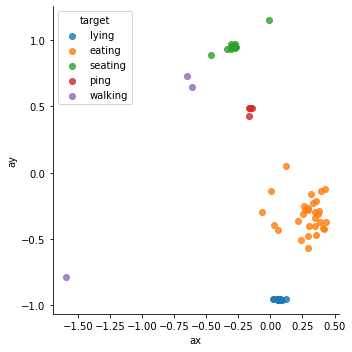

In [28]:
sns.lmplot(x="ax", y="ay", hue='Predict', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['lying', 'eating', 'seating','ping','walking'])
plt.show()

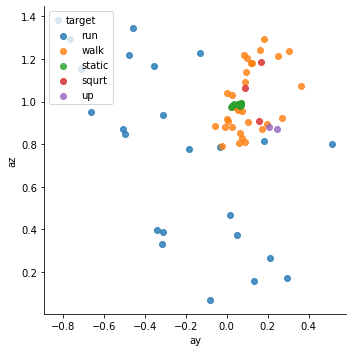

In [45]:
sns.lmplot(x="ay", y="az", hue='行為', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['run', 'walk', 'static','squrt','up'])
plt.show()

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
# 假設你的資料集是一個csv檔案，名為data.csv
data = pd.read_csv("cat_static (3).csv")

# 把三軸加速度的數據做為輸入x
x_data = data[["ax", "ay", "az"]].values

# 假設動作分類的名稱在一個欄位名為'action'
actions = data["action"].unique()
action_dict = {action: i for i, action in enumerate(actions)}
y_data = data["action"].map(action_dict).values

# 轉換資料形狀以符合LSTM模型的輸入需求，並將y_data進行one-hot編碼
x_data = np.reshape(x_data, (x_data.shape[0], 1, x_data.shape[1]))
y_data = to_categorical(y_data)

# 設計LSTM模型
# 設計LSTM模型
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(x_data.shape[1], x_data.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.6))
model.add(Dense(y_data.shape[1], activation='softmax'))
# 編譯模型，並設定損失函數和優化器
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 訓練模型
model.fit(x_data, y_data, epochs=25, batch_size=64, validation_split=0.2)


Epoch 1/25
9/9 [==============================] - 5s 140ms/step - loss: 1.7765 - accuracy: 0.4643 - val_loss: 1.7932 - val_accuracy: 0.3143
Epoch 2/25
9/9 [==============================] - 0s 23ms/step - loss: 1.7371 - accuracy: 0.6411 - val_loss: 1.7951 - val_accuracy: 0.3143
Epoch 3/25
9/9 [==============================] - 0s 21ms/step - loss: 1.6834 - accuracy: 0.6429 - val_loss: 1.8001 - val_accuracy: 0.3143
Epoch 4/25
9/9 [==============================] - 0s 21ms/step - loss: 1.6017 - accuracy: 0.6196 - val_loss: 1.8134 - val_accuracy: 0.3143
Epoch 5/25
9/9 [==============================] - 0s 22ms/step - loss: 1.4866 - accuracy: 0.6268 - val_loss: 1.8529 - val_accuracy: 0.3143
Epoch 6/25
9/9 [==============================] - 0s 25ms/step - loss: 1.3297 - accuracy: 0.6286 - val_loss: 1.9539 - val_accuracy: 0.3143
Epoch 7/25
9/9 [==============================] - 0s 27ms/step - loss: 1.1457 - accuracy: 0.6357 - val_loss: 2.1760 - val_accuracy: 0.3071
Epoch 8/25
9/9 [==========

In [3]:
data = pd.read_csv("cat_static (3)_test.csv")

# 把三軸加速度的數據做為輸入x
new_data= data[["ax", "ay", "az"]].values

new_data = np.reshape(new_data, (new_data.shape[0], 1, new_data.shape[1]))

# 使用模型進行預測
predictions = model.predict(new_data)

# 將預測結果轉換為動作分類
predicted_actions = [actions[np.argmax(prediction)] for prediction in predictions]
print(f"The predicted action is: {predicted_actions}")
data

2/2 [==============================] - 0s 3ms/step
The predicted action is: ['seating', 'seating', 'seating', 'ping', 'ping', 'seating', 'ping', 'walking', 'walking', 'walking', 'walking', 'eating', 'eating', 'eating', 'eating', 'seating', 'seating', 'seating', 'seating', 'ping', 'ping', 'ping', 'ping', 'eating', 'ping', 'ping', 'ping', 'ping', 'ping', 'ping', 'ping', 'ping', 'ping', 'ping', 'eating', 'walking', 'eating', 'eating', 'eating', 'eating', 'eating', 'eating', 'eating']


,ax,ay,az,action
0,-0.463257,0.608643,0.487061,walking
1,-0.017334,0.788574,0.414551,walking
2,-0.459717,0.890137,0.217773,walking
3,-0.011963,1.148315,-0.193970,walking
4,0.518433,0.874023,-0.227539,walking
5,-0.065430,0.976074,0.269653,walking
6,0.808594,0.100952,0.618286,walking
7,-0.424316,0.037476,1.321777,walking
8,-0.469727,-0.686157,0.514893,walking
9,-0.727417,-0.519775,0.323975,walking


In [4]:
from sklearn.metrics import accuracy_score

# 讀取CSV檔案
new_data = pd.read_csv("cat_static (3)_test.csv")

# 把三軸加速度的數據做為輸入x
x_new = new_data[["ax", "ay", "az"]].values

# 假設動作分類的名稱在一個欄位名為'action'
y_new = new_data["action"].map(action_dict).values

# 轉換數據形狀以符合模型的輸入需求
x_new = np.reshape(x_new, (x_new.shape[0], 1, x_new.shape[1]))

# 使用模型進行預測
predictions = model.predict(x_new)

# 將預測結果轉換為動作分類
predicted_actions = np.array([np.argmax(prediction) for prediction in predictions])

# 計算準確率
accuracy = accuracy_score(y_new, predicted_actions)

print(f"The accuracy of the model on the new data is: {accuracy}")

2/2 [==============================] - 0s 3ms/step
The accuracy of the model on the new data is: 0.5348837209302325
